In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pathMain = 'API_19_DS2_en_excel_v2_6002116.xls'

In [3]:


def dataInitialize(mainData): 

    #Reads the data file and takes out all the sheets from it
    dfData = pd.read_excel(mainData, header = 3)
    dfCountryMetaData = pd.read_excel(mainData, sheet_name = 'Metadata - Countries')

    #Merged columns from Data and Country MetaData
    dfDataMerged = pd.merge(dfData, dfCountryMetaData, on = 'Country Code', how = 'inner')
    dfDataMerged = dfDataMerged.reset_index()

    #Sorting Columns out, changing column positions to start of df and removing unwanted columns
    columnslist = dfDataMerged.columns.tolist()
    columnslist.insert(4,columnslist.pop(dfDataMerged.columns.get_loc('Region')))
    columnslist.insert(5,columnslist.pop(dfDataMerged.columns.get_loc('IncomeGroup')))
    dfDataMerged = dfDataMerged[columnslist]
    dfDataMerged = dfDataMerged.drop(columns = ['SpecialNotes', 'TableName', 'index'], axis = 1)

    #Setting Multilevel Index for df (dfCountry)
    dfCountry = dfDataMerged.set_index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Indicator Code', 'Indicator Name'])

    dfCountry = dfCountry.loc[pd.IndexSlice[ :, :, :, ('Upper middle income', 'Lower middle income', 'High income', 'Low income'), :, :] , :]

    return dfCountry



In [4]:
dfCountry = dataInitialize(pathMain)

In [5]:
#CREATING DATAFRAMES FOR ALL VISUALIZATIONS

dfPopulationTotal = dfCountry.loc[pd.IndexSlice[:, :, :, :, ('SP.POP.TOTL'), :], :]

dfUrbanAgglo = dfCountry.loc[pd.IndexSlice[:, :, :, :, ('EN.URB.MCTY.TL.ZS'), :], :]

dfUrbanPopulation = dfCountry.loc[pd.IndexSlice[:, :, :, :, ('SP.URB.TOTL'), :], :]

dfpoverty = dfCountry.loc[pd.IndexSlice[:, :, :, :, ('SI.POV.DDAY'), :], :]


In [6]:
dfPopulationTotal.reset_index(inplace = True)
dfUrbanAgglo.reset_index(inplace = True)
dfUrbanPopulation.reset_index(inplace = True)
dfpoverty.reset_index(inplace=True)

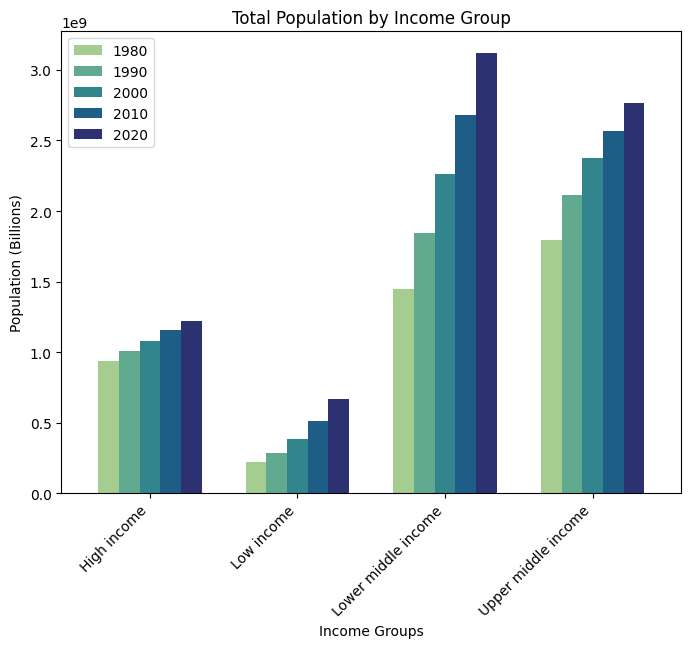

In [7]:
dfPopTotal = pd.melt(dfPopulationTotal, id_vars = ['Country Name', 'Indicator Name', 'IncomeGroup'], value_vars = [str(x) for x in range(1980, 2021, 10)])
popGroup = dfPopTotal.groupby(['IncomeGroup', 'variable'])['value'].sum().reset_index()
popGroup.pivot(index = ['IncomeGroup'], columns = 'variable', values = 'value').plot(kind = 'bar', width = 0.7, figsize = (8, 6), colormap = 'crest')

plt.xlabel('Income Groups')
plt.ylabel('Population (Billions)')
plt.title('Total Population by Income Group')
plt.xticks(rotation = 45, ha = 'right')
plt.legend()
plt.show()

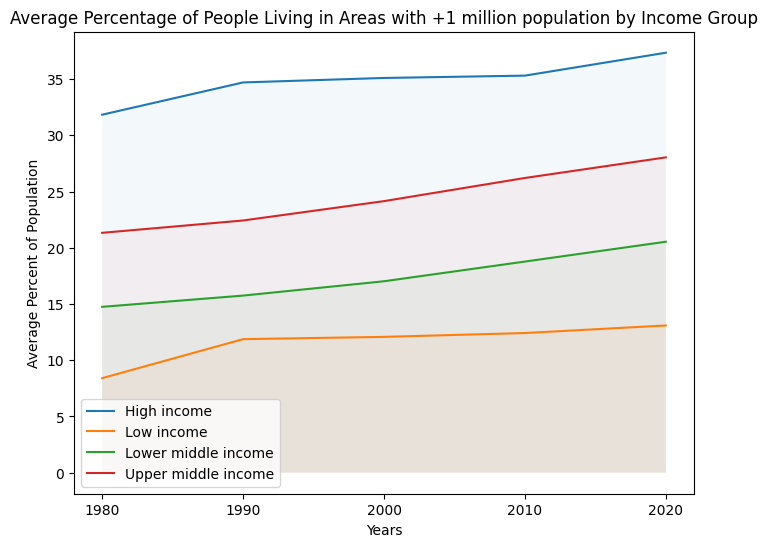

In [8]:
dfAgglo = pd.melt(dfUrbanAgglo, id_vars = ['Country Name', 'Indicator Name', 'IncomeGroup'], value_vars = [str(x) for x in range(1980, 2021, 10)])
aggloGroup = dfAgglo.groupby(['IncomeGroup', 'variable'])['value'].mean().reset_index()
AggloPivot = aggloGroup.pivot_table(index = 'IncomeGroup', columns = 'variable', values = 'value')

plt.figure(figsize = (8, 6))

line1_data = AggloPivot.transpose()
for country in line1_data.columns:
    plt.plot(line1_data.index, line1_data[country], label=country)
    plt.fill_between(line1_data.index, line1_data[country], alpha = 0.05)

plt.xlabel('Years')
plt.ylabel('Average Percent of Population')
plt.title('Average Percentage of People Living in Areas with +1 million population by Income Group')
plt.legend() 

plt.show()

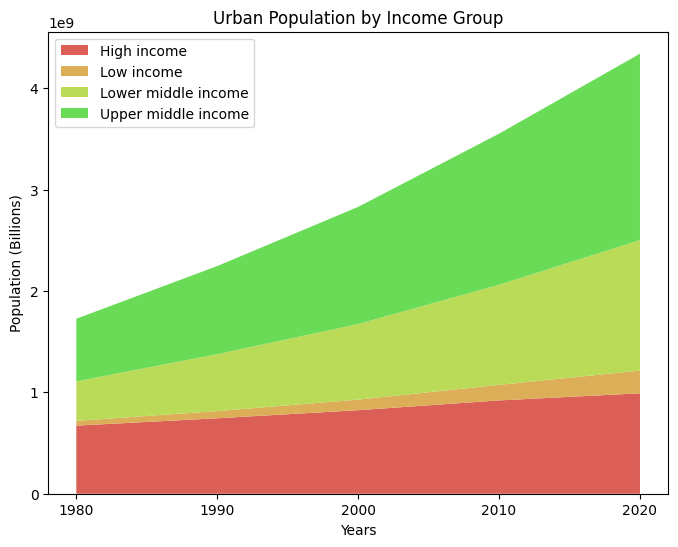

In [9]:
dfUrbPop = pd.melt(dfUrbanPopulation, id_vars = ['Country Name', 'Indicator Name', 'IncomeGroup'], value_vars = [str(x) for x in range(1980, 2021, 10)])
urbPopGroup = dfUrbPop.groupby(['IncomeGroup', 'variable'])['value'].sum().reset_index()
UrbPopPivot = urbPopGroup.pivot_table(index = 'IncomeGroup', columns = 'variable', values = 'value')

plt.figure(figsize = (8, 6))

years = UrbPopPivot.columns
values = UrbPopPivot.values

pallete = sns.color_palette('hls', 10)

plt.stackplot(years, values, labels = UrbPopPivot.index, colors = pallete)

plt.xlabel('Years')
plt.ylabel('Population (Billions)')
plt.title('Urban Population by Income Group')
plt.legend(loc='upper left')

plt.show()

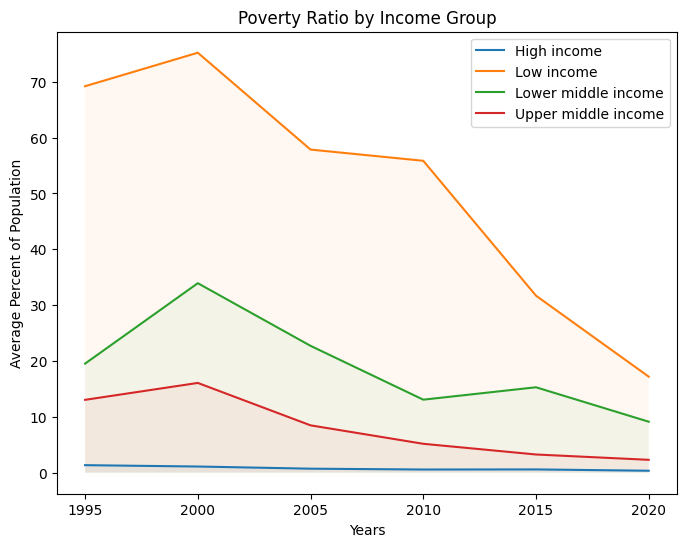

In [10]:
povertydf = pd.melt(dfpoverty, id_vars = ['Country Name', 'Indicator Name', 'IncomeGroup'], value_vars = [str(x) for x in range(1995, 2021, 5)])
povertyGroup = povertydf.groupby(['IncomeGroup', 'variable'])['value'].mean().reset_index()
povertyPivot = povertyGroup.pivot_table(index = 'IncomeGroup', columns = 'variable', values = 'value')

plt.figure(figsize = (8, 6))

line_data = povertyPivot.transpose()
for country in line_data.columns:
    plt.plot(line_data.index, line_data[country], label=country)
    plt.fill_between(line_data.index, line_data[country], alpha = 0.05)

plt.xlabel('Years')
plt.ylabel('Average Percent of Population')
plt.title('Poverty Ratio by Income Group')
plt.legend() 

plt.show()